## Fandanago Moving Ratings: Still Biased??
In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator that displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars). 

According to Hickey's article, there's a significant discrepancy between the number of stars displayed to users and the actual rating - which he was able to find in the HTML of the page. He  discovered that the actual rating was almost always rounded **up** to the nearest half-star; for instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect. 

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional.


>**Goal:** In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 100  # Avoid having displayed truncated output

### Load Datasets

In [2]:
ratings_before = pd.read_csv("fandango_score_comparison.csv")
ratings_before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
ratings_after = pd.read_csv("movie_ratings_16_17.csv")
ratings_after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


## Data Exploration
Our dataset has some redundant columns, so we isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use.

For the data set with ratings before Hickey's analysis, we select the following columns: `'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'`.

For the other data set, we select: `'movie', 'year', 'fandango'.`

In [4]:
print(ratings_before.columns)

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')


In [5]:
fandango_cols = ['FILM'] + [col for col in ratings_before.columns if 'Fandango_' in col]
print(fandango_cols)

['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']


In [6]:
fandango_before = ratings_before[fandango_cols]
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [7]:
fandango_after = ratings_after[['movie', 'year', 'fandango']]
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [8]:
print('Number of movies in fandango_before: ', fandango_before.shape[0])
print('Number of movies in fandango_after: ', fandango_after.shape[0])

Number of movies in fandango_before:  146
Number of movies in fandango_after:  214


#### Population of interest
Since our goal is to analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis; our population of interest is all movies on the Fandango's website, regardless of the releasing year.

So to avoid large sampling errors and consequently wrong conclusions, lets see if our two datasets are representative of our population of interest

***rating_before dataset:*** contains 146 movies data sampled prior to Hickey's analysis and the population of interest then was all movies on the Fandango website up on till 2015. From reading HIckey's article and the READ.me of the [dataset's github repo](https://github.com/fivethirtyeight/data/tree/master/fandango), we see that he used the following sampling conditions:
- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

But we notice the sampling was not random, because not every movie had equal chance of being included in the sample - in fact some had zero chances e.g movies without tickets on sale in 2015, movies that had less than 30 fan ratings. Also, the fact that movie rating could change over the years, even makes sample more unlikely a representation of the population we are interested in describing

***rating_after dataset:*** contains movie data sampled after Hickey's analysis and according to the READ.me of the [dataset's github repo](https://github.com/mircealex/Movie_ratings_2016_17), the sampling conditions are as follows:
- The movie must have been released in 2016 or 2017.
- The movie must have had a significant number of votes and reviews (unclear how many from the README.md nor from the data).

We see this sample is also not random and its moving ratings are subject to change, thus, making the sample an unlikely representation of the population we are trying to describe.

>From above, it's clear both our datasets are not representative of our population of interest which leaves us with two options: either we collect new data or we alter the goal of our analysis

>Tweaking our goal seems a much better choice compared to collecting new data.

### Adjusting the goal of the project
Since neither of our data is representative of the population of interest, lets to tweak the goal of the project a little.

>Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.
    
With this new goal, we have two populations of interest:
- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

But then, how do we tell whether or not a movie is **popular**?? - for this project, a movie is considered "popular" only if it has at least 30 fan ratings (using Hickey's benchmark) on the Fandango's website. 

Now, we move on to check if both samples contain popular movies

In [9]:
print(sum(fandango_before.Fandango_votes < 30))

0


There are no movies with less than 30 fan ratings in Hickey's dataset, as expected.

Before checking for popular movies in our second dataset, it is worth to recall that a particular benchmark for number of movie reviews wasn't set while sampling the Fandango website. Thus, raising representativity issues once again.

To ensure we have a representative sample, let's do a quick sampling of our sampled data - to ascertain we have enough popular movies

In [10]:
fandango_after.sample(10, random_state=0)

,movie,year,fandango
197,The Take (Bastille Day),2016,4.0
37,Come and Find Me,2016,4.0
89,Kickboxer,2016,4.0
176,The Founder,2016,4.0
170,The Darkness,2016,2.5
75,Ice Age: Collision Course,2016,4.0
96,Lion,2016,4.0
137,Ride Along 2,2016,4.0
5,A Monster Calls,2016,4.0
83,Jane Got a Gun,2016,3.5


> As of June 2020, these are the number of fan ratings we found on Fandango's website:
>
> |Movie|Fan ratings|
> |:----|:----|
> |The Take (Bastille Day)|3807|
> |Come and Find Me|558|
> |Kickboxer|51340|
> |The Founder|32316|
> |The Darkness|6708|
> |Ice Age: Collision Course|33028|
> |Lion|39737|
> |Ride Along 2|35036|
> |A Monster Calls|25262|
> |Jane Got a Gun|14054|

All the movies in our sample are popular. Hence, move forward with our analysis.

### Further Data Exploration

In [11]:
fandango_before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [12]:
#Lets extract the release year from FILM column

fandango_before = fandango_before.copy()
fandango_before["Year"] = fandango_before["FILM"].str.extract(r'(20[1-9][1-9])', expand=False)

print(fandango_before["Year"].unique(), '\n')
print(fandango_before["Year"].value_counts())

['2015' '2014'] 

2015    129
2014     17
Name: Year, dtype: int64


We see there are some 17 movies from 2014 in our dataset which are redundant to our analysis, since we want to work with popular movies in 2015 only.

In [13]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [14]:
print(fandango_after["year"].unique(), '\n')
print(fandango_after["year"].value_counts())

[2016 2017] 

2016    191
2017     23
Name: year, dtype: int64


We observe there are some 2017 movies in our dataset which again are redundant to our analysis, since we want to work with popular movies in 2016 only in this dataset.

We proceed to **isolating only the sample points that belong to our populations of interest**, i.e the movies released in 2015 in a separate data set and the movies released in 2016 in another.

In [15]:
fandango_2015 = fandango_before[fandango_before.Year == '2015'].copy()
fandango_2015.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [16]:
fandango_2016 = fandango_after[fandango_after.year == 2016].copy()
fandango_2016.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


### Comparing Distribution Shapes for 2015 and 2016
To achieve our goal of determining whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016, let's plot and compare distibutions of both data samples.

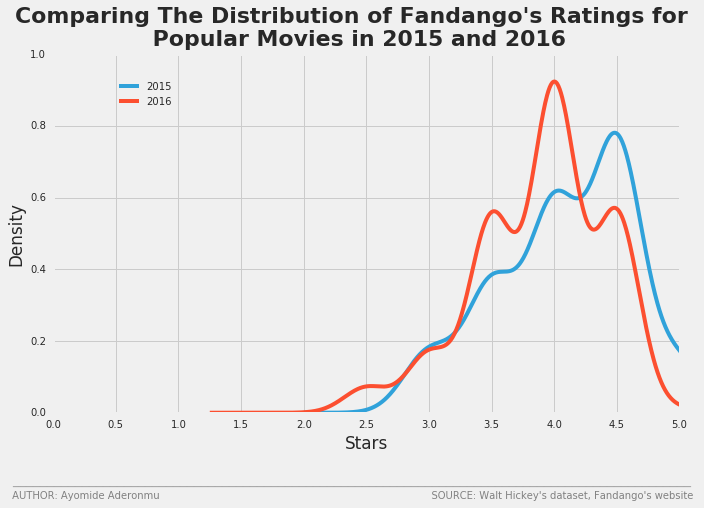

In [17]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(10,6))


fandango_2015["Fandango_Stars"].plot.kde(label=2015, legend=True)
fandango_2016["fandango"].plot.kde(label=2016, legend=True)

ax.set_xlim(0, 5)
ax.set_xticks(np.arange(0,5.1,0.5))
plt.xlabel("Stars")

fig.suptitle("Comparing The Distribution of Fandango\'s Ratings for \n Popular Movies in 2015 and 2016", 
             fontsize= 22, weight="bold", y=1.01)

plt.text(x=-0.33,y=-0.2, s='_'*97, color='grey', alpha=.65)
plt.text(x=-0.35,y=-0.24, fontsize= 10, color= 'grey',
         s=' AUTHOR: Ayomide Aderonmu' + (' ')*87 + 'SOURCE: Walt Hickey\'s dataset, Fandango\'s website ')


plt.legend(loc='upper left', bbox_to_anchor=(.09,0.95))

plt.show()

What do we observe?

    - Both distibutions are strongly left skewed, with 2015 distibution being the most skewed
    - The slight left shift of 2016 distribution shows 2016 ratings are slightly lower compared to 2015, hinting that there is actually a difference in Fandango's rating of popular movies in 2015 and Fandango's rating of popular movies 2016. 

### Comparing Relative Frequency
Next, we examine and analyze the frequency distribution tables of the two distributions. We try to determine answers to the following questions:

>- The samples have different number of movies. Does it make sense to compare the two tables using absolute frequencies?
- If absolute frequencies are not useful here, would relative frequencies be of more help? If so, what would be better for readability — proportions or percentages?
    
>- Is it still clear that there is a difference between the two distributions?
- What can we tell about the direction of the difference just from the tables? Is the direction still that clear anymore?

In [18]:
print('Distribution of 2015 ratings:', "\n")
print(fandango_2015.Fandango_Stars.value_counts(normalize=True).sort_index() * 100)
print('Number of Fandango popular movies in 2015:', len(fandango_2015.Fandango_Stars), "\n")

Distribution of 2015 ratings: 

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64
Number of Fandango popular movies in 2015: 129 



In [19]:
#generate the frequency dist table as percentage of the total for better readability
print('Distribution of 2016 ratings:', "\n")
print(fandango_2016.fandango.value_counts(normalize=True).sort_index() * 100)
print('Number of Fandango popular movies in 2016:', len(fandango_2016), "\n")

Distribution of 2016 ratings: 

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64
Number of Fandango popular movies in 2016: 191 



>**NOTE:** because the samples have different number of movies, we compare the two tables using relative frequencies (rather than absolute frequncies). Also for easy readibility, we use percentages (rather than proportions).

**From the two tables, we observe that:**\
Minimum rating in 2016 is lower than 2015, i.e unlike 2015 where the least rating for any popular movie was 3.0 stars, in 2016 about 3% of popular movies were rated 2.5

The percentage of popular movies rated 4.5 and 5.0 stars in 2016 dropped compared to 2015. We see that less than 1% of 2015 popular movies had 5.0 star rating, while in 2015 were almost 7% of the popular movies were rated 5.0 and the percentage of popular movies rated 4.5 dropped from 38% in 2015 to approx. 25% in 2016

A greater percentage of 2016 popular movies received 3.5 and 4.0 stars compared to 2015.

For the observations above, we confirm that there is indeed a slight difference in the two distributions. Although the direction of this difference is not as clear as it was on the kernel distribution plots.

### Determination of the Direction of Change
We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

We'll take a couple of summary statistics to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its `mean`, `median`, and `mode`, and then compare these statistics to determine what they tell about the direction of the difference.

In [20]:
fandango_2015_mean = fandango_2015["Fandango_Stars"].mean()
fandango_2015_median = fandango_2015["Fandango_Stars"].median()
fandango_2015_mode = fandango_2015["Fandango_Stars"].mode()[0]

fandango_2016_mean = fandango_2016["fandango"].mean()
fandango_2016_median = fandango_2016["fandango"].median()
fandango_2016_mode = fandango_2016["fandango"].mode()[0]

summary_stat = pd.DataFrame({"mean": [fandango_2015_mean, fandango_2016_mean], 
                             "median":[fandango_2015_median, fandango_2016_median],
                             "mode": [fandango_2015_mode, fandango_2016_mode]}, index=['2015', '2016']).T
summary_stat

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


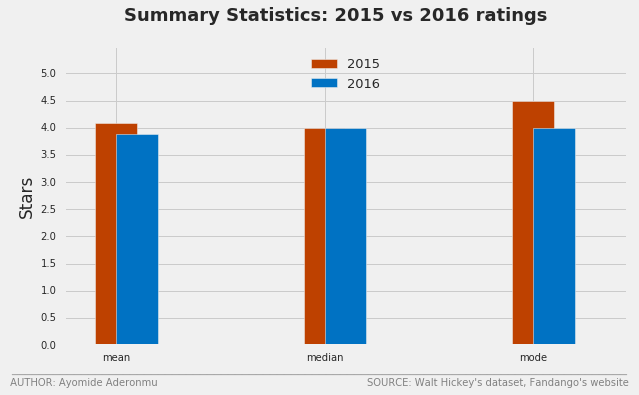

In [21]:
fig, ax = plt.subplots(figsize=(9,5))
summary_stat['2015'].plot.bar(label='2015', color=(190/255, 65/255, 0), width=.2, legend=True)
summary_stat['2016'].plot.bar(label='2016', color=(0/255, 114/255, 195/255), align='edge', width=.2, legend=True)

plt.xticks(rotation=0)
ax.set_ylim(0,5.5)
ax.set_yticks(np.arange(0,5.1,0.5))
plt.ylabel("Stars")

fig.suptitle("Summary Statistics: 2015 vs 2016 ratings", fontsize=18, weight='bold', y=1.01)

plt.text(x=-0.5,y=-0.5, s='_'*88, color='grey', alpha=.65)
plt.text(x=-0.52,y=-0.75, fontsize= 10, color= 'grey',
         s=' AUTHOR: Ayomide Aderonmu' + (' ')*67 + 'SOURCE: Walt Hickey\'s dataset, Fandango\'s website ')

plt.legend(loc='upper center', fontsize=13)
plt.show()

What do we notice?
- The most common star rating in 2016 is 0.5 lower than 2015 most frequent rating
- The median is the same for both distributions
- The mean rating of popular movies dropped by about 0.2 in 2016 - telling us ratings of 2016 popular movies are on average lower compared to ratings of 2015 movies; thus confirming the direction of the change we noticed on the kernel density plots

## Conclusion
Our analysis tells us there is indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. On average, Fandango rated popular movies released in 2016 lower than the popular movies released in 2015.

Although, we cannot say for sure, but the slight difference is most likely due to Fandango fixing the supposed bug that biased their rating system prior to Hickey's analysis/discovery.